<a href="https://colab.research.google.com/github/rajuzumaki2207/Time_series_Sequence/blob/main/TSusingLSTMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv(csv_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [6]:
df = df[5::6]

In [7]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [8]:
df.index = pd.to_datetime(df["Date Time"], format= "%d.%m.%Y %H:%M:%S")

In [9]:
temp =df["T (degC)"]

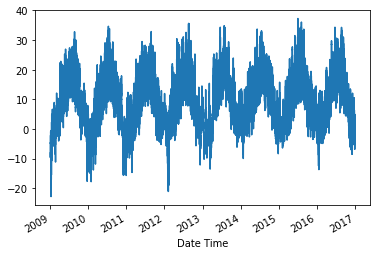

In [10]:
temp.plot()

In [11]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []

  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label= df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)


In [12]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)

In [13]:
X.shape , y.shape

((70086, 5, 1), (70086,))

In [14]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model1 =Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, "linear"))

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [18]:
cp = ModelCheckpoint("model1/", save_best_only=True)

In [19]:
model1.compile(loss="mse", optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [20]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs =10, callbacks=[cp])

Epoch 1/10
1865/1875 [============================>.] - ETA: 0s - loss: 27.8078 - root_mean_squared_error: 5.2733

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 19s 7ms/step - loss: 27.6757 - root_mean_squared_error: 5.2608 - val_loss: 1.3857 - val_root_mean_squared_error: 1.1772
Epoch 2/10
1863/1875 [============================>.] - ETA: 0s - loss: 2.1417 - root_mean_squared_error: 1.4634

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 2.1366 - root_mean_squared_error: 1.4617 - val_loss: 0.6253 - val_root_mean_squared_error: 0.7908
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.9040 - root_mean_squared_error: 0.9508

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.9042 - root_mean_squared_error: 0.9509 - val_loss: 0.5277 - val_root_mean_squared_error: 0.7264
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7191 - root_mean_squared_error: 0.8480 - val_loss: 0.5477 - val_root_mean_squared_error: 0.7400
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6789 - root_mean_squared_error: 0.8240

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.6788 - root_mean_squared_error: 0.8239 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7096
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6663 - root_mean_squared_error: 0.8163

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.6661 - root_mean_squared_error: 0.8161 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6575 - root_mean_squared_error: 0.8109 - val_loss: 0.5016 - val_root_mean_squared_error: 0.7082
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6528 - root_mean_squared_error: 0.8079 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6498 - root_mean_squared_error: 0.8061

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6497 - root_mean_squared_error: 0.8061 - val_loss: 0.4872 - val_root_mean_squared_error: 0.6980
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6469 - root_mean_squared_error: 0.8043 - val_loss: 0.4882 - val_root_mean_squared_error: 0.6987


In [22]:
from tensorflow.keras.models import load_model
model1 = load_model("/content/model1")

In [23]:
train_prediction =  model1.predict(X_train).flatten()

In [24]:
train_results = pd.DataFrame(data={"Train Prediction": train_prediction, "Actuals": y_train})

In [25]:
train_results 

,Train Prediction,Actuals
0,-10.032013,-9.67
1,-9.883071,-9.17
2,-8.938683,-8.10
3,-7.338974,-7.66
4,-7.293503,-7.04
...,...,...
59995,5.845676,6.07
59996,7.169222,9.88
59997,12.101694,13.53
59998,15.850493,15.43


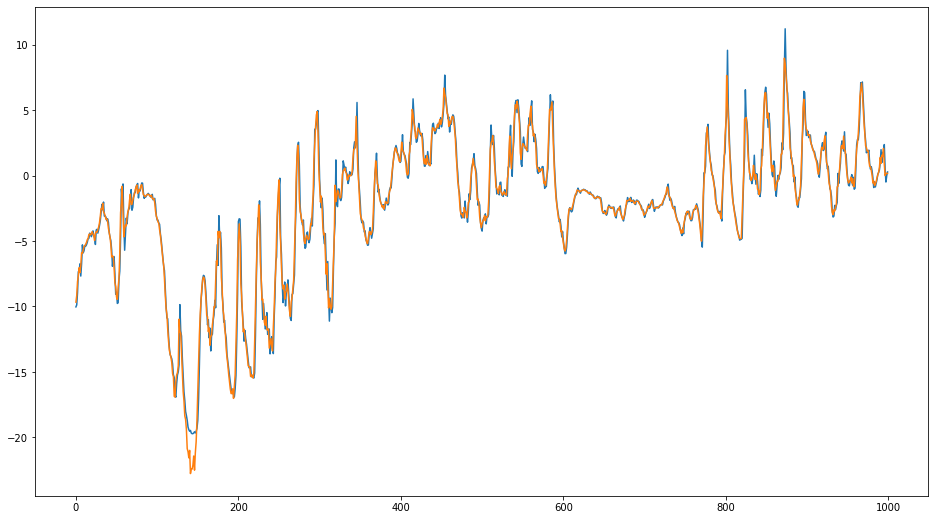

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(train_results["Train Prediction"][0:1000])
plt.plot(train_results["Actuals"][0:1000])